# Train VAE model

This notebook will first try to train the current VAE model before modifying the loss function to work with count data

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
from ponyo import utils, train_vae_modules

Using TensorFlow backend.


In [2]:
# Set seeds to get reproducible VAE trained models
train_vae_modules.set_all_seeds()

In [3]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

# Read in config variables
config_filename = os.path.abspath(
    os.path.join(base_dir, "test_vae_training", "config_current_vae.tsv")
)

params = utils.read_config(config_filename)

dataset_name = params["dataset_name"]

raw_compendium_filename = params["raw_compendium_filename"]
normalized_compendium_filename = params["normalized_compendium_filename"]

In [4]:
# Try normalzing the data
# Here we are normalizing the microbiome count data per taxon
# so that each taxon is in the range 0-1
train_vae_modules.normalize_expression_data(
    base_dir, config_filename, raw_compendium_filename, normalized_compendium_filename
)

input: dataset contains 11857 samples and 1232 genes
Output: normalized dataset contains 11857 samples and 1232 genes


In [5]:
test1 = pd.read_csv(raw_compendium_filename, sep="\t")
test2 = pd.read_csv(normalized_compendium_filename, sep="\t")

In [6]:
test1.head()

,Unnamed: 0,Bacteria Actinobacteriota Actinobacteria Bifidobacteriales Bifidobacteriaceae Bifidobacterium,Bacteria Bacteroidota Bacteroidia Bacteroidales Bacteroidaceae Bacteroides,Bacteria Actinobacteriota Coriobacteriia Coriobacteriales Coriobacteriaceae Collinsella,Bacteria Firmicutes Clostridia Lachnospirales Lachnospiraceae Agathobacter,Bacteria Firmicutes Negativicutes Veillonellales-Selenomonadales Selenomonadaceae Megamonas,Bacteria Firmicutes Clostridia Lachnospirales Lachnospiraceae Blautia,Bacteria Firmicutes Clostridia Oscillospirales Ruminococcaceae Faecalibacterium,Bacteria Firmicutes Clostridia Lachnospirales Lachnospiraceae Anaerostipes,Bacteria Bacteroidota Bacteroidia Bacteroidales Prevotellaceae Prevotella,...,Bacteria Actinobacteriota Acidimicrobiia Microtrichales Ilumatobacteraceae NA,Bacteria Verrucomicrobiota Verrucomicrobiae Pedosphaerales Pedosphaeraceae ADurb.Bin063-1,Bacteria Proteobacteria Alphaproteobacteria Caulobacterales Caulobacteraceae PMMR1,Bacteria Bacteroidota Bacteroidia Flavobacteriales Cryomorphaceae NA,Bacteria Bacteroidota Bacteroidia Flavobacteriales Flavobacteriaceae Pseudofulvibacter,Bacteria Proteobacteria Alphaproteobacteria Rickettsiales Rickettsiaceae NA,Bacteria Bacteroidota Bacteroidia Flavobacteriales Flavobacteriaceae Gelidibacter,Bacteria Proteobacteria Gammaproteobacteria Burkholderiales Comamonadaceae Ideonella,Bacteria Proteobacteria Alphaproteobacteria Rhizobiales Xanthobacteraceae Rhodoplanes,Bacteria Proteobacteria Alphaproteobacteria Sphingomonadales Sphingomonadaceae Rhizorhapis
0,PRJDB5310_DRR077057,311,423,0,0,0,0,429,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PRJDB5310_DRR077058,243,313,0,0,0,13,239,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PRJDB5310_DRR077059,0,255,0,196,0,477,297,51,0,...,0,0,0,0,0,0,0,0,0,0
3,PRJDB5310_DRR077060,698,0,167,159,0,158,151,23,0,...,0,0,0,0,0,0,0,0,0,0
4,PRJDB5310_DRR077061,39,335,64,96,61,189,104,68,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test2.head()

,Unnamed: 0,Bacteria Actinobacteriota Actinobacteria Bifidobacteriales Bifidobacteriaceae Bifidobacterium,Bacteria Bacteroidota Bacteroidia Bacteroidales Bacteroidaceae Bacteroides,Bacteria Actinobacteriota Coriobacteriia Coriobacteriales Coriobacteriaceae Collinsella,Bacteria Firmicutes Clostridia Lachnospirales Lachnospiraceae Agathobacter,Bacteria Firmicutes Negativicutes Veillonellales-Selenomonadales Selenomonadaceae Megamonas,Bacteria Firmicutes Clostridia Lachnospirales Lachnospiraceae Blautia,Bacteria Firmicutes Clostridia Oscillospirales Ruminococcaceae Faecalibacterium,Bacteria Firmicutes Clostridia Lachnospirales Lachnospiraceae Anaerostipes,Bacteria Bacteroidota Bacteroidia Bacteroidales Prevotellaceae Prevotella,...,Bacteria Actinobacteriota Acidimicrobiia Microtrichales Ilumatobacteraceae NA,Bacteria Verrucomicrobiota Verrucomicrobiae Pedosphaerales Pedosphaeraceae ADurb.Bin063-1,Bacteria Proteobacteria Alphaproteobacteria Caulobacterales Caulobacteraceae PMMR1,Bacteria Bacteroidota Bacteroidia Flavobacteriales Cryomorphaceae NA,Bacteria Bacteroidota Bacteroidia Flavobacteriales Flavobacteriaceae Pseudofulvibacter,Bacteria Proteobacteria Alphaproteobacteria Rickettsiales Rickettsiaceae NA,Bacteria Bacteroidota Bacteroidia Flavobacteriales Flavobacteriaceae Gelidibacter,Bacteria Proteobacteria Gammaproteobacteria Burkholderiales Comamonadaceae Ideonella,Bacteria Proteobacteria Alphaproteobacteria Rhizobiales Xanthobacteraceae Rhodoplanes,Bacteria Proteobacteria Alphaproteobacteria Sphingomonadales Sphingomonadaceae Rhizorhapis
0,PRJDB5310_DRR077057,0.001496,0.000948,0.000000,0.000000,0.000000,0.000000,0.004278,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PRJDB5310_DRR077058,0.001169,0.000702,0.000000,0.000000,0.000000,0.000046,0.002383,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PRJDB5310_DRR077059,0.000000,0.000572,0.000000,0.001081,0.000000,0.001694,0.002962,0.001032,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PRJDB5310_DRR077060,0.003358,0.000000,0.004034,0.000877,0.000000,0.000561,0.001506,0.000465,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PRJDB5310_DRR077061,0.000188,0.000751,0.001546,0.000529,0.003158,0.000671,0.001037,0.001376,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Create VAE directories if needed
output_dirs = [
    os.path.join(base_dir, dataset_name, "models"),
    os.path.join(base_dir, dataset_name, "logs"),
]

NN_architecture = params["NN_architecture"]

# Check if NN architecture directory exist otherwise create
for each_dir in output_dirs:
    sub_dir = os.path.join(each_dir, NN_architecture)
    os.makedirs(sub_dir, exist_ok=True)

input dataset contains 11857 samples and 1232 genes
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
tracking <tf.Variable 'Variable:0' shape=() dtype=float32> beta
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/alexandra/anaconda3/envs/microbe/lib/python3.7/site-packages/keras/engine/training_utils.py:819: UserWarning: Output custom_variational_layer_1 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to custom_variational_layer_1.
  'be expecting any data to be passed to {0}.'.format(name))



Train on 8893 samples, validate on 2964 samples
Epoch 1/60
8893/8893 [==============================] - 9s 1ms/step - loss: 68.6511 - val_loss: 7.1458
Epoch 2/60
8893/8893 [==============================] - 9s 994us/step - loss: 9.4693 - val_loss: 6.1317
Epoch 3/60
8893/8893 [==============================] - 9s 994us/step - loss: 11.8504 - val_loss: 6.1744
Epoch 4/60
8893/8893 [==============================] - 9s 997us/step - loss: 8.7215 - val_loss: 5.9112
Epoch 5/60
8893/8893 [==============================] - 9s 996us/step - loss: 7.3189 - val_loss: 5.5653
Epoch 6/60
8893/8893 [==============================] - 9s 1ms/step - loss: 5.6767 - val_loss: 5.5280
Epoch 7/60
8893/8893 [==============================] - 9s 1ms/step - loss: 5.4191 - val_loss: 6.3352
Epoch 8/60
8893/8893 [==============================] - 9s 995us/step - loss: 5.4361 - val_loss: 8.3667
Epoch 9/60
8893/8893 [==============================] - 9s 989us/step - loss: 5.3970 - val_loss: 9.4190
Epoch 10/60
8893/88

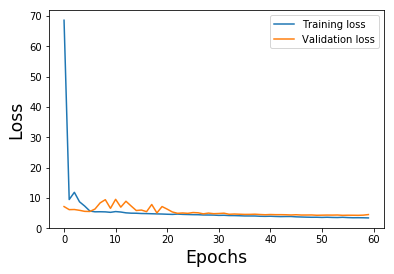

In [9]:
# Train VAE on new compendium data
train_vae_modules.train_vae(config_filename, normalized_compendium_filename)

In [10]:
# Plot training and validation loss separately
stat_logs_filename = "logs/NN_2500_30/tybalt_2layer_30latent_stats.tsv"

stats = pd.read_csv(stat_logs_filename, sep="\t", index_col=None, header=0)

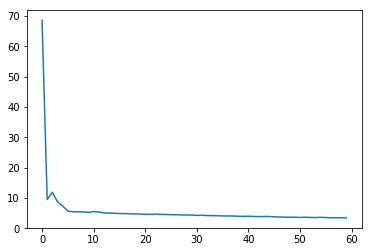

In [11]:
plt.plot(stats["loss"])

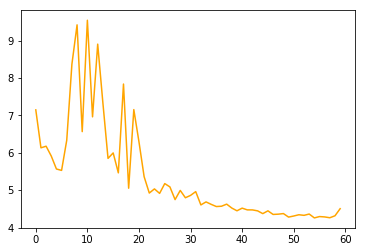

In [12]:
plt.plot(stats["val_loss"], color="orange")